# 0.) Import and Clean data

In [100]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [102]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [103]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W9/Country-data.csv", sep = ",")

In [104]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [105]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [106]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [107]:
# Scale
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# 1.) Fit a kmeans Model with any Number of Clusters

In [108]:
kmeans = KMeans(n_clusters= 5, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [109]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

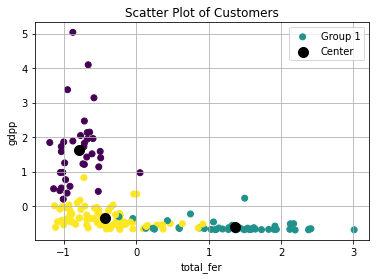

In [127]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 7
x2_index = 8

plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 619.9371152246031,
 574.8843362973539,
 510.4183030550231,
 470.71458212397863,
 431.3217173175508,
 399.6735381192681,
 371.2724622359936,
 355.39481242385557,
 337.05884906710884,
 325.7193712341622]

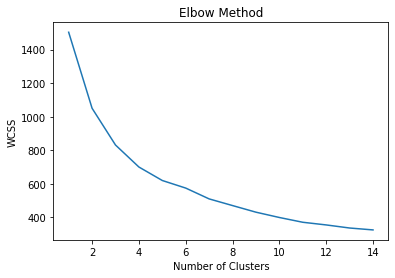

In [111]:
# calculates WCSSs (1)
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters=k, n_init=30, init='random')
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

plt.plot(range(1, 15), WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 620.2564324973123,
 571.0906956738324,
 499.60176969005545,
 463.50540911151364,
 425.22553715405445,
 404.9067087327162,
 374.0916143294538,
 346.84274098813495,
 349.82759029446504,
 318.6445542821805]

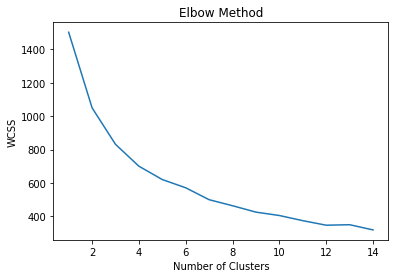

In [112]:
# calculates WCSSs (2)
WCSSs = [KMeans(n_clusters=k, n_init=30, init='random').fit(X_scaled).inertia_ for k in range(1, 15)]

plt.plot(range(1, 15), WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
WCSSs

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [113]:
# Improvements
d_WCSSs = pd.DataFrame(WCSSs).diff()
d_WCSSs

,0
0,NaN
1,-452.785442
2,-218.790123
3,-131.101437
4,-80.066566
5,-49.165737
6,-71.488926
7,-36.096361
8,-38.279872
9,-20.318828


I picked 3 for k as the WCSS drops by a large amount turning to 3 and I thought the countries could be categorized as developed countries, developing countries and least developed countries. 

In [114]:
# Pick k and fit the model
k = 3
kmeans = KMeans(n_clusters= k, random_state=42, n_init=30, init='random').fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [115]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
kmeans.predict(X_scaled)

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [116]:
output= pd.concat([preds, X, names], axis=1)
output

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan
1,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria
3,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola
4,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,2,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Vanuatu
163,2,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Venezuela
164,2,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Vietnam
165,1,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Yemen


In [123]:
# cluster 1
print('cluster 1')
list1 = list(output[output[0]==0]['country'])
list1 

cluster 1


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [122]:
# cluster 2
print('cluster 2')
list2 = list(output[output[0]==1]['country'])
list2

cluster 2


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [121]:
# cluster 3
print('cluster 3')
list3 = list(output[output[0]==2]['country'])
list3

cluster 3


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [124]:
print(len(list1))
print(len(list2))
print(len(list3))

36
47
84


The first group of countries are rich developed countries (36 countries), the second group of countries are least developed countries (47 countries), and the last group of countries (84 countries) are countries with moderate development. The countries are well divided by 3 groups and they seem to have similar characteristics.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interpretation

In [125]:
# pd,data
q6df = pd.concat([preds, X], axis=1)

In [126]:
q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


# Q7.) Write an observation about the descriptive statistics.

The first group, the most developed countries have an extremely low child mortality rate of 5% compared to other groups, very high income and gdp per person, low inflation, high life expectancy and low fertility rate. Also, they have the highest health score. Exports and imports are the highest in the first group as well. 
The second group has the exact opposite characteristics to the first group having very high child mortality, low life expectancy and poor economic developments. The last group is placed in the middle of the two other groups. The only field that this group is not in the middle is the health index. We can see that the third group has lower health score than the second group on average. It could be explained by the fact that actively developing countries could exprience more pollution, which worsens health of the citizens. 